<a href="https://colab.research.google.com/github/rijalmyd/KTP-Image-Classification-CNN/blob/main/CNN_KTP_OR_NOT_KTP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar Bahan Makanan

## Menyiapkan Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/CNN/ktp.zip" -d "/content/drive/MyDrive/CNN/"

Archive:  /content/drive/MyDrive/CNN/ktp.zip
   creating: /content/drive/MyDrive/CNN/train/KTP/
  inflating: /content/drive/MyDrive/CNN/train/KTP/1(1).jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/1.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/1_jpg.rf.212d1a759d4c32840f7fe066516291bb.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/10(1).jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/10.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/100.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/101.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/102.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/104.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/105.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/106.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/107.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/108.jpg  
  inflating: /content/drive/MyDrive/CNN/train/KTP/109.jpg  
  inflating: /content/driv

## Preprocessing Data

In [3]:
TRAINING_DIR = "/content/drive/MyDrive/CNN/train"
VALIDATION_DIR = "/content/drive/MyDrive/CNN/val"

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=False)

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 292 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


## Membuat Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [15]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Callback

In [10]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      print('\nAkurasi sudah cukup, karena melebihi 0.99')
      self.model.stop_training = True

myCallback = MyCallback()

## Melatih Model

In [16]:
# latih model dengan model.fit
H = model.fit(
      train_generator, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator,
      callbacks=[myCallback]
)

Epoch 1/20
73/73 [==============================] - 212s 3s/step - loss: 0.5617 - accuracy: 0.8253 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 2/20
73/73 [==============================] - 3s 36ms/step - loss: 0.0908 - accuracy: 0.9658 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 3/20
73/73 [==============================] - 3s 36ms/step - loss: 0.1474 - accuracy: 0.9486 - val_loss: 0.0229 - val_accuracy: 0.9863
Epoch 4/20
73/73 [==============================] - 4s 52ms/step - loss: 0.0330 - accuracy: 0.9863 - val_loss: 0.1391 - val_accuracy: 0.9589
Epoch 5/20
73/73 [==============================] - 3s 36ms/step - loss: 0.0171 - accuracy: 0.9932 - val_loss: 0.0166 - val_accuracy: 0.9863
Epoch 6/20
73/73 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Akurasi sudah cukup, karena melebihi 0.975
73/73 [==============================] - 3s 34ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000


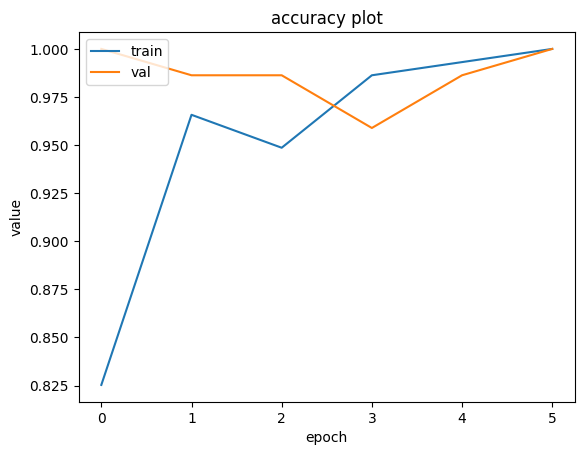

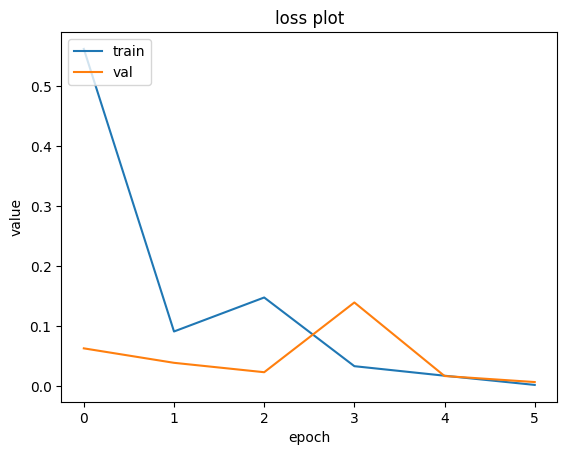

In [17]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

## Mengubah Model

In [18]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)


In [19]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [21]:
tflite_model_file = pathlib.Path('ktp.tflite')
tflite_model_file.write_bytes(tflite_model)


42549392

# Testing

Saving 730.jpg to 730.jpg
1/1 [==============================] - 0s 19ms/step
730.jpg
NOT KTP


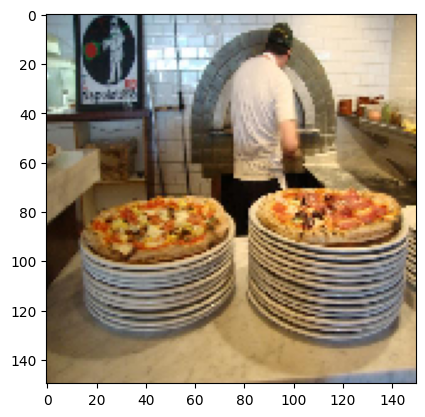

In [29]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('KTP')
  else:
   print('NOT KTP')